# Peruvian News Article Title Analysis

___

I just wanted to take some time and outline the inner workings of the project colab file. Firstly, its super important that you keep the folers in the "project_peruvian_news" folder the same, and <font color='orange'>make sure the folder is on your main home page</font>  in google drive. If any of the names are changed, the analysis will not run correctly.

Oh yeah, I almost forgot. <font color='orange'>Run this peice of code below</font>

Notice that once you allow access you should be able to have access to the data in the specificed project data folder... conviently labelled 'data'

This is where we can store versions of our data, I recommend maybe leaving the folder alone for now, but if you need to, feel free to change the data to the projects needs

# Notebook Abstract:
DO NOT run this notebook without completing the "ScapeAndProcess.ipynb" file.

In the following notebook, we will showcase the key proejct topics and concepts we utilized to analyze peruvian news articles. Firstly, we will load the dataframe from the latest saved file computed from the "ScapeAndProcess.ipynb" file. Secondly, I begin the natural language processing entourage by applying lemmization, stemming and tagging to all of the words in the titles. 

Once these first to tasks are completeed, we are able to create a list of all tokenized words in each title, allowing us to start working on the large project concepts of Topic Modeling and Sentiment Analysis

# Imports

Here is just a super large cell holding all of the neccessary imports that our project will use for:

- creating dataframes
- filtering data
- plotting data
- machine learning
- preforming nautral language processing
- preforming topic modeling


In [124]:
!pip install nltk
import nltk
import re
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords  
from nltk.corpus import words
from collections import Counter 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Gensim
!pip install -U gensim==3.8.3
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# installing mallet
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip


import pandas as pd
import numpy as np
import datetime as dt

# Plotting tools
import matplotlib
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Center outputs
from IPython.core.display import HTML, Markdown
HTML("""
<style>
.output_png, .output {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

import warnings
warnings.filterwarnings('once')

c:\Users\PC\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
c:\Users\PC\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
c:\Users\PC\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already u

# Loading Dataframe

Here we load in our data for the project that you provided... 

Infact, there is a completely different CoLab notebook dedicated to preparing the original data to fit into this CoLab.

In [125]:
# here is the name of the file within the data folder. I recommend not changing this
#data_path='/data_news.csv'
df=pd.read_csv("../data/data_en.csv")

In [126]:
# once reading the file there are some columns we no longer need, so I removed them here
df=df.drop(columns=['Unnamed: 0',"titulo"])
df.head()

,categoria,href,fecha,title
0,Mundo,/mundo/vida-verdaderamente-dura-habitantes-teh...,2018-01-01,"The ""truly hard"" life of the inhabitants of Te..."
1,Mundo,/mundo/ecuador-ley-fortalecer-dolarizacion-vig...,2018-01-01,"Ecuador: Law to strengthen dollarization, in f..."
2,Internacional,/mundo/internacional/pingueinos-resguardan-fri...,2018-01-01,Even the penguins take shelter from the extrem...
3,Internacional,/mundo/internacional/25-anos-separacion-tercip...,2018-01-01,"The 25 years of the ""velvet separation"" of the..."
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...


## Adjusting fecha to datetime objects

I noticed that all the fechas are strings, not datetime objects. This isn't a problem, but it's nice to have a function to change it to a datetime object

In [127]:
def convertToDatetime(x):
  dt_obj = dt.datetime.strptime(x, '%Y-%m-%d')
  return dt_obj
# converting all the rows's dates to datetime objects
df['fecha'] = df['fecha'].apply(convertToDatetime)
df['year'] = df['fecha'].apply((lambda x: x.year))

In [128]:
df.head()

,categoria,href,fecha,title,year
0,Mundo,/mundo/vida-verdaderamente-dura-habitantes-teh...,2018-01-01,"The ""truly hard"" life of the inhabitants of Te...",2018
1,Mundo,/mundo/ecuador-ley-fortalecer-dolarizacion-vig...,2018-01-01,"Ecuador: Law to strengthen dollarization, in f...",2018
2,Internacional,/mundo/internacional/pingueinos-resguardan-fri...,2018-01-01,Even the penguins take shelter from the extrem...,2018
3,Internacional,/mundo/internacional/25-anos-separacion-tercip...,2018-01-01,"The 25 years of the ""velvet separation"" of the...",2018
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...,2018


# Applying Lemmazation, Stemming, and tagging to all rows

Here We made an attempt at accurately tokenizing the titles for all the rows.

I do so by first, removing all numbers, removing all punctuation, then tokenizing every word. 

The reason I haven't made all the words lowercase yet is becuase I want to tag all the words to their grammatical association

In [129]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    stop_words = stopwords.words('english')
    return [[word for word in simple_preprocess(str(doc)) if (word not in stop_words) & (len(word) > 2)] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# funciton to remove numbers
def removeNumbers(s):
  pattern = r'[0-9]'
  return re.sub(pattern, '', s)

# funciton to remove punctuation
def removePunctuation(s):
  pattern = r'[^\w\s]'
  return re.sub(pattern, '', s)

# function that lemmatizes and stems an array of words for later analysis
def lemmatizeStemArryOfWords(arr):
  result = [lemmatizer.lemmatize(word) for word in arr]
  result = [ps.stem(word) for word in result]
  return result

In [130]:
warnings.filterwarnings('once')
# creating all tokens of the title
df['tokens'] = df['title'].apply(removeNumbers).apply(removePunctuation).apply(nltk.word_tokenize)
df['tokens'] = remove_stopwords(df['tokens'])
# creating lemming and stemming model instances
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

# lemmatize and stem nouns
df['lem_tokens'] = df['tokens'].apply(lemmatizeStemArryOfWords)


## Bigram Analysis

In [131]:
warnings.filterwarnings('once')
data_words = list(sent_to_words(df['lem_tokens']))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [132]:
# creating tags for each tokenized word
df['taggedWords'] = [nltk.tag.pos_tag(tokens) for tokens in data_words_bigrams]

In [133]:
df

,categoria,href,fecha,title,year,tokens,lem_tokens,taggedWords
0,Mundo,/mundo/vida-verdaderamente-dura-habitantes-teh...,2018-01-01,"The ""truly hard"" life of the inhabitants of Te...",2018,"[truly, hard, life, inhabitants, tehran]","[truli, hard, life, inhabit, tehran]","[(truli, VB), (hard, JJ), (life, NN), (inhabit..."
1,Mundo,/mundo/ecuador-ley-fortalecer-dolarizacion-vig...,2018-01-01,"Ecuador: Law to strengthen dollarization, in f...",2018,"[ecuador, law, strengthen, dollarization, forc...","[ecuador, law, strengthen, dollar, forc, trust...","[(ecuador, NN), (law, NN), (strengthen, NN), (..."
2,Internacional,/mundo/internacional/pingueinos-resguardan-fri...,2018-01-01,Even the penguins take shelter from the extrem...,2018,"[even, penguins, take, shelter, extreme, cold,...","[even, penguin, take, shelter, extrem, cold, h...","[(even, RB), (penguin, NNS), (take, VBP), (she..."
3,Internacional,/mundo/internacional/25-anos-separacion-tercip...,2018-01-01,"The 25 years of the ""velvet separation"" of the...",2018,"[years, velvet, separation, czech, republic, s...","[year, velvet, separ, czech, republ, slovakia]","[(year, NN), (velvet, NN), (separ, NN), (czech..."
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...,2018,"[midis, pension, reaches, budget, execution]","[midi, pension, reach, budget, execut]","[(midi, JJ), (pension, NN), (reach, NN), (budg..."
...,...,...,...,...,...,...,...,...
26893,Economía,/economia/se-proyecta-el-ingreso-a-tacna-de-70...,2022-05-01,"The entry to Tacna of 7,000 Chileans is projec...",2022,"[entry, tacna, chileans, projected, first, day...","[entri, tacna, chilean, project, first, day, r...","[(entri, NN), (tacna, NN), (chilean, NN), (pro..."
26894,Economía,/economia/estos-son-las-15-ciudades-que-regist...,2022-05-01,These are the 15 cities that registered an inf...,2022,"[cities, registered, inflation, greater, last,...","[citi, regist, inflat, greater, last, month]","[(citi, JJ), (regist, NN), (inflat, NN), (grea..."
26895,Mundo,/mundo/gobierno-boliviano-decreta-un-increment...,2022-05-01,Bolivian government decrees a wage increase re...,2022,"[bolivian, government, decrees, wage, increase...","[bolivian, govern, decre, wage, increas, rejec...","[(bolivian, JJ), (govern, JJ), (decre, NN), (w..."
26896,Mundo,/mundo/chile-reabre-mayoria-de-sus-fronteras-t...,2022-05-01,Chile reopens most of its land borders to tour...,2022,"[chile, reopens, land, borders, tourists]","[chile, reopen, land, border, tourist]","[(chile, NN), (reopen, JJ), (land, NN), (borde..."


In [134]:
print("# of rows:",df.shape[0])
df.head()

# of rows: 26898


,categoria,href,fecha,title,year,tokens,lem_tokens,taggedWords
0,Mundo,/mundo/vida-verdaderamente-dura-habitantes-teh...,2018-01-01,"The ""truly hard"" life of the inhabitants of Te...",2018,"[truly, hard, life, inhabitants, tehran]","[truli, hard, life, inhabit, tehran]","[(truli, VB), (hard, JJ), (life, NN), (inhabit..."
1,Mundo,/mundo/ecuador-ley-fortalecer-dolarizacion-vig...,2018-01-01,"Ecuador: Law to strengthen dollarization, in f...",2018,"[ecuador, law, strengthen, dollarization, forc...","[ecuador, law, strengthen, dollar, forc, trust...","[(ecuador, NN), (law, NN), (strengthen, NN), (..."
2,Internacional,/mundo/internacional/pingueinos-resguardan-fri...,2018-01-01,Even the penguins take shelter from the extrem...,2018,"[even, penguins, take, shelter, extreme, cold,...","[even, penguin, take, shelter, extrem, cold, h...","[(even, RB), (penguin, NNS), (take, VBP), (she..."
3,Internacional,/mundo/internacional/25-anos-separacion-tercip...,2018-01-01,"The 25 years of the ""velvet separation"" of the...",2018,"[years, velvet, separation, czech, republic, s...","[year, velvet, separ, czech, republ, slovakia]","[(year, NN), (velvet, NN), (separ, NN), (czech..."
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...,2018,"[midis, pension, reaches, budget, execution]","[midi, pension, reach, budget, execut]","[(midi, JJ), (pension, NN), (reach, NN), (budg..."


once the tagging is completed, we can then attempt to separate all words by their grammatical association.

In other words, we can separate all forms of verbs, adjectives, and nouns into their own columns.

In [135]:
# function to return an array of only the specificed grammatical association
def getSpecificWordsfromTaggedWords(arr, tag='nouns'):
  if tag=='verbs':
    tags = ['VB','VBD','VBG','VBN','VBP','VBZ']
  elif tag=='adjectives':
    tags = ['JJ','JJR','JJS']
  else:
    tags = ['NN','NNP','NNS','NNPS']

  if tag!='bigrams':
    result = [word for (word, tag) in arr if tag in tags]
  else:
    result = [word for (word, tag) in arr if '_' in word ]
  return result

# making a new column of only nouns
df['nouns'] = df['taggedWords'].apply(lambda arr: getSpecificWordsfromTaggedWords(arr, tag='nouns'))
# making a new column of only verbs
df['verbs'] = df['taggedWords'].apply(lambda arr: getSpecificWordsfromTaggedWords(arr, tag='verbs'))
# making a new column of only adjectives
df['adjectives'] = df['taggedWords'].apply(lambda arr: getSpecificWordsfromTaggedWords(arr, tag='adjectives'))
# making a new column of only adjectives
df['bigrams'] = df['taggedWords'].apply(lambda arr: getSpecificWordsfromTaggedWords(arr, tag='bigrams'))



####
# Take into account the bigrams in lem_tokens for topic modeling
df['lem_tokens'] = df['taggedWords'].apply(lambda x: [word for word,name in x])
####

In [136]:
df.head()

,categoria,href,fecha,title,year,tokens,lem_tokens,taggedWords,nouns,verbs,adjectives,bigrams
0,Mundo,/mundo/vida-verdaderamente-dura-habitantes-teh...,2018-01-01,"The ""truly hard"" life of the inhabitants of Te...",2018,"[truly, hard, life, inhabitants, tehran]","[truli, hard, life, inhabit, tehran]","[(truli, VB), (hard, JJ), (life, NN), (inhabit...","[life, inhabit, tehran]",[truli],[hard],[]
1,Mundo,/mundo/ecuador-ley-fortalecer-dolarizacion-vig...,2018-01-01,"Ecuador: Law to strengthen dollarization, in f...",2018,"[ecuador, law, strengthen, dollarization, forc...","[ecuador, law, strengthen, dollar, forc, trust...","[(ecuador, NN), (law, NN), (strengthen, NN), (...","[ecuador, law, strengthen, dollar, trust]",[forc],[skeptic],[]
2,Internacional,/mundo/internacional/pingueinos-resguardan-fri...,2018-01-01,Even the penguins take shelter from the extrem...,2018,"[even, penguins, take, shelter, extreme, cold,...","[even, penguin, take, shelter, extrem, cold, h...","[(even, RB), (penguin, NNS), (take, VBP), (she...","[penguin, shelter, extrem, canada]","[take, cold, hit]",[],[]
3,Internacional,/mundo/internacional/25-anos-separacion-tercip...,2018-01-01,"The 25 years of the ""velvet separation"" of the...",2018,"[years, velvet, separation, czech, republic, s...","[year, velvet, separ, czech, republ, slovakia]","[(year, NN), (velvet, NN), (separ, NN), (czech...","[year, velvet, separ, czech, republ, slovakia]",[],[],[]
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...,2018,"[midis, pension, reaches, budget, execution]","[midi, pension, reach, budget, execut]","[(midi, JJ), (pension, NN), (reach, NN), (budg...","[pension, reach, budget, execut]",[],[midi],[]


## Create the Dictionary and Corpus needed for Topic Modeling

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. 

In [137]:
# Create Dictionary
id2word = corpora.Dictionary(df['lem_tokens'])

# Create Corpus
texts = df['lem_tokens']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# Sentiment Analysis
Within this sectionof the notebook, we will be displaying our understanding sentiment analysis whilst providing some useful graphics of our data. For this project we decided to use the VADER model to compute sentiment analysis scores


In [138]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# separating the score object to create new columns
def getSentimentColumns(seriesOfScores):
  neg = []
  neu = []
  pos = []
  for score in seriesOfScores:
    neg.append(score['neg'])
    neu.append(score['neu'])
    pos.append(score['pos'])
  return neg, neu, pos

# Compute VADER scores
df['neg'],df['neu'],df['pos'] = getSentimentColumns(df['title'].apply(lambda text: sid.polarity_scores(text)))
df['compound']  = df['title'].apply(lambda text: sid.polarity_scores(text)).apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >0 else 'neg' if c <0 else 'neu')
df.head()

,categoria,href,fecha,title,year,tokens,lem_tokens,taggedWords,nouns,verbs,adjectives,bigrams,neg,neu,pos,compound,comp_score
0,Mundo,/mundo/vida-verdaderamente-dura-habitantes-teh...,2018-01-01,"The ""truly hard"" life of the inhabitants of Te...",2018,"[truly, hard, life, inhabitants, tehran]","[truli, hard, life, inhabit, tehran]","[(truli, VB), (hard, JJ), (life, NN), (inhabit...","[life, inhabit, tehran]",[truli],[hard],[],0.124,0.619,0.257,0.3612,pos
1,Mundo,/mundo/ecuador-ley-fortalecer-dolarizacion-vig...,2018-01-01,"Ecuador: Law to strengthen dollarization, in f...",2018,"[ecuador, law, strengthen, dollarization, forc...","[ecuador, law, strengthen, dollar, forc, trust...","[(ecuador, NN), (law, NN), (strengthen, NN), (...","[ecuador, law, strengthen, dollar, trust]",[forc],[skeptic],[],0.128,0.513,0.359,0.5574,pos
2,Internacional,/mundo/internacional/pingueinos-resguardan-fri...,2018-01-01,Even the penguins take shelter from the extrem...,2018,"[even, penguins, take, shelter, extreme, cold,...","[even, penguin, take, shelter, extrem, cold, h...","[(even, RB), (penguin, NNS), (take, VBP), (she...","[penguin, shelter, extrem, canada]","[take, cold, hit]",[],[],0.000,1.000,0.000,0.0000,neu
3,Internacional,/mundo/internacional/25-anos-separacion-tercip...,2018-01-01,"The 25 years of the ""velvet separation"" of the...",2018,"[years, velvet, separation, czech, republic, s...","[year, velvet, separ, czech, republ, slovakia]","[(year, NN), (velvet, NN), (separ, NN), (czech...","[year, velvet, separ, czech, republ, slovakia]",[],[],[],0.000,1.000,0.000,0.0000,neu
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...,2018,"[midis, pension, reaches, budget, execution]","[midi, pension, reach, budget, execut]","[(midi, JJ), (pension, NN), (reach, NN), (budg...","[pension, reach, budget, execut]",[],[midi],[],0.000,0.882,0.118,0.0516,pos


In [139]:
def getStringDate(dt_obj):
  mth = dt_obj.strftime("%b")
  day = dt_obj.strftime("%d")
  year = dt_obj.strftime("%Y")
  return str(mth+' '+day+' '+year)


In [140]:
def minMixScale(arr):
  # print('Original List:',arr)
  xmin = min(arr) 
  xmax=max(arr)
  for i, x in enumerate(arr):
      arr[i] = (x-xmin) / (xmax-xmin)
  # print('Normalized List:',arr)
  return arr

## Filtering the Data to only the top 5 topics whose sentiment changed the most

In [141]:
grouped_multiple = df.groupby(['year', 'categoria']).agg({'compound': ['mean', 'min', 'max']})
grouped_multiple.columns = ['compound_mean', 'compound_min', 'compound_max']
grouped_multiple = grouped_multiple.reset_index()

In [142]:
grouped_multiple

,year,categoria,compound_mean,compound_min,compound_max
0,2018,Economía,0.022756,-0.8658,0.8885
1,2018,Empresas,0.017851,-0.8591,0.8689
2,2018,Internacional,-0.055318,-0.9022,0.8481
3,2018,Mercados,-0.009363,-0.8689,0.7906
4,2018,Mundo,-0.063547,-0.8957,0.8126
5,2018,Política,0.003424,-0.9186,0.8442
6,2019,Economía,0.028413,-0.8074,0.8885
7,2019,Empresas,0.013738,-0.8442,0.8176
8,2019,Internacional,-0.061553,-0.8807,0.7783
9,2019,Mercados,0.005083,-0.7650,0.7506


In [143]:
diff={}
for categoria in grouped_multiple['categoria'].unique():
  compound2020=grouped_multiple[(grouped_multiple['categoria']==categoria) & (grouped_multiple['year']==2020)].iloc[0]['compound_mean']
  compound2021=grouped_multiple[(grouped_multiple['categoria']==categoria) & (grouped_multiple['year']==2021)].iloc[0]['compound_mean']
  diff[categoria] = abs(compound2020-compound2021)

topFiveCategoriesOfInterest=[]
count=0
# print(diff.keys())

for key in diff.keys():
  # print(key)
  if (count > 4):
    if (diff[key] > diff[topFiveCategoriesOfInterest[-1]]):
      topFiveCategoriesOfInterest[-1]=key
      topFiveCategoriesOfInterest=sorted(topFiveCategoriesOfInterest, reverse=True)
  else:
    topFiveCategoriesOfInterest.append(key)
  count+=1
  
print('the top five categorias are', topFiveCategoriesOfInterest)

the top five categorias are ['Economía', 'Empresas', 'Internacional', 'Mercados', 'Mundo']


## Sentiment over time

Personally, one of our favorite visuals, this one in particular allows us to observe the change in average sentiment of the course of 2020-2021. 

- The red line repersents the negativity
- The blue line represents the positivity
- The black line represents the amount of published articles

The faded lines are the raw values used to calculate the blue/red lines




c:\Users\PC\anaconda3\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\PC\anaconda3\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.

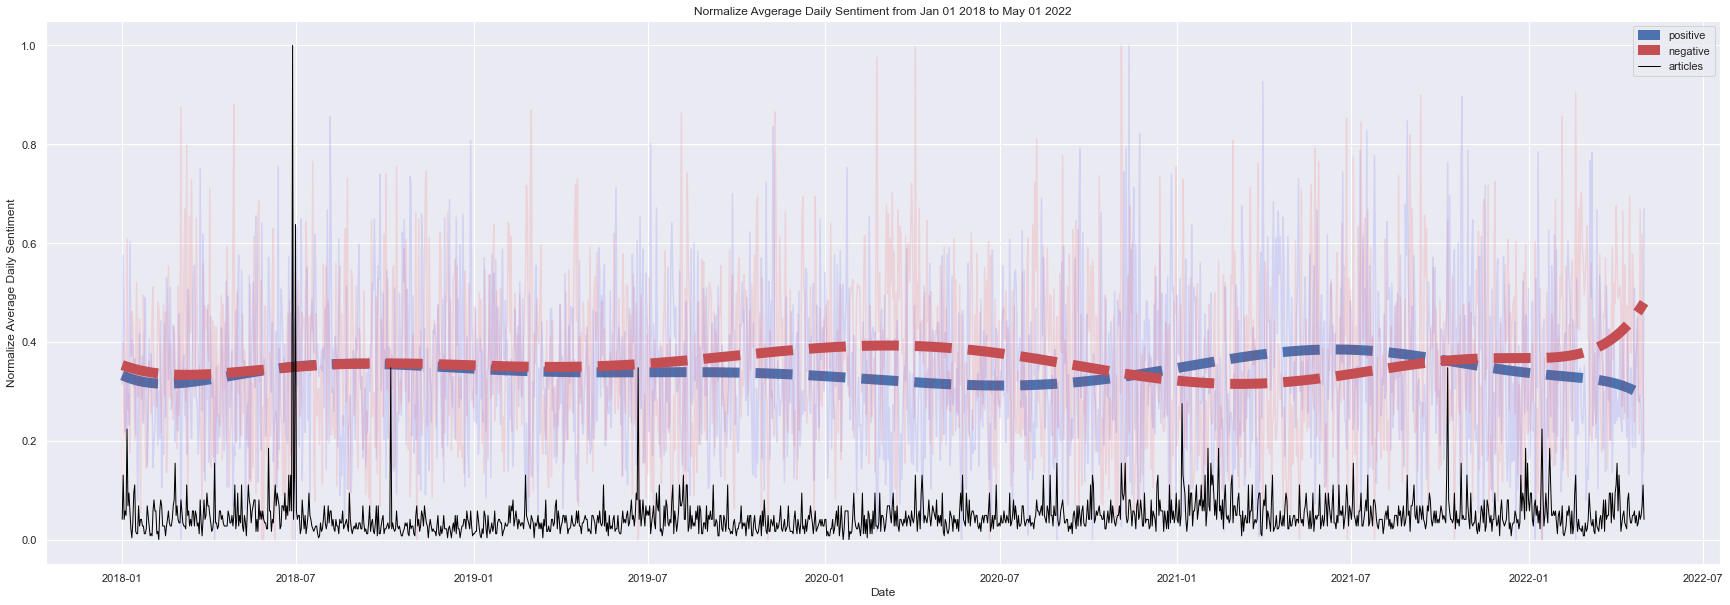

In [144]:
x_values = df['fecha'].unique()
y_neg_values = []
y_pos_values = []
daily_articles_counts=[]
for date in x_values:
  # daily_compund_total = 0
  daily_negative_total = 0
  daily_positive_total = 0
  daily_count = 0
  subset = df[df['fecha']==date]
  # print('on: ', date, ' we have', subset.shape[0], ' entries')
  for i, row in subset.iterrows():
    if row['compound'] >= 0:
      daily_positive_total += row['compound']
    else:
      daily_negative_total += abs(row['compound'])
    daily_count =+1
  avg_daily_negative_total = daily_negative_total/subset.shape[0]
  avg_daily_positive_total = daily_positive_total/subset.shape[0]
  avg_daily_count = daily_count/subset.shape[0]
  y_neg_values.append(avg_daily_negative_total)
  y_pos_values.append(avg_daily_positive_total)
  daily_articles_counts.append(avg_daily_count)
# scale everything
y_neg_values = minMixScale(y_neg_values)
y_pos_values = minMixScale(y_pos_values)
daily_articles_counts = minMixScale(daily_articles_counts)

dates = matplotlib.dates.date2num(x_values)
fig = plt.figure(figsize=(30,10))
plt.plot_date(dates, y_pos_values, 'blue', alpha=0.1)
# calc the trendline for positive
p = np.polyfit(dates, y_pos_values, deg=50)
y_ = np.polyval(p, dates)
plt.plot(dates, y_, 'b--', linewidth=10, label ='positive')

plt.plot_date(dates, y_neg_values, 'red', alpha=0.1)
# calc the trendline for positive
p = np.polyfit(dates, y_neg_values, deg=50)
y_ = np.polyval(p, dates)
plt.plot(dates, y_, 'r--', linewidth=10, label ='negative')

plt.plot_date(dates, daily_articles_counts, 'black', linewidth=1, label ='articles')

minDate = getStringDate(df['fecha'].min().to_pydatetime())
maxDate = getStringDate(df['fecha'].max().to_pydatetime())
plt.title('Normalize Avgerage Daily Sentiment from '+minDate+' to '+maxDate)
plt.ylabel('Normalize Average Daily Sentiment')
plt.xlabel('Date')
plt.legend()
plt.show()


In [145]:
df_pol = df[df['categoria'] == 'Política']

c:\Users\PC\anaconda3\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\PC\anaconda3\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.

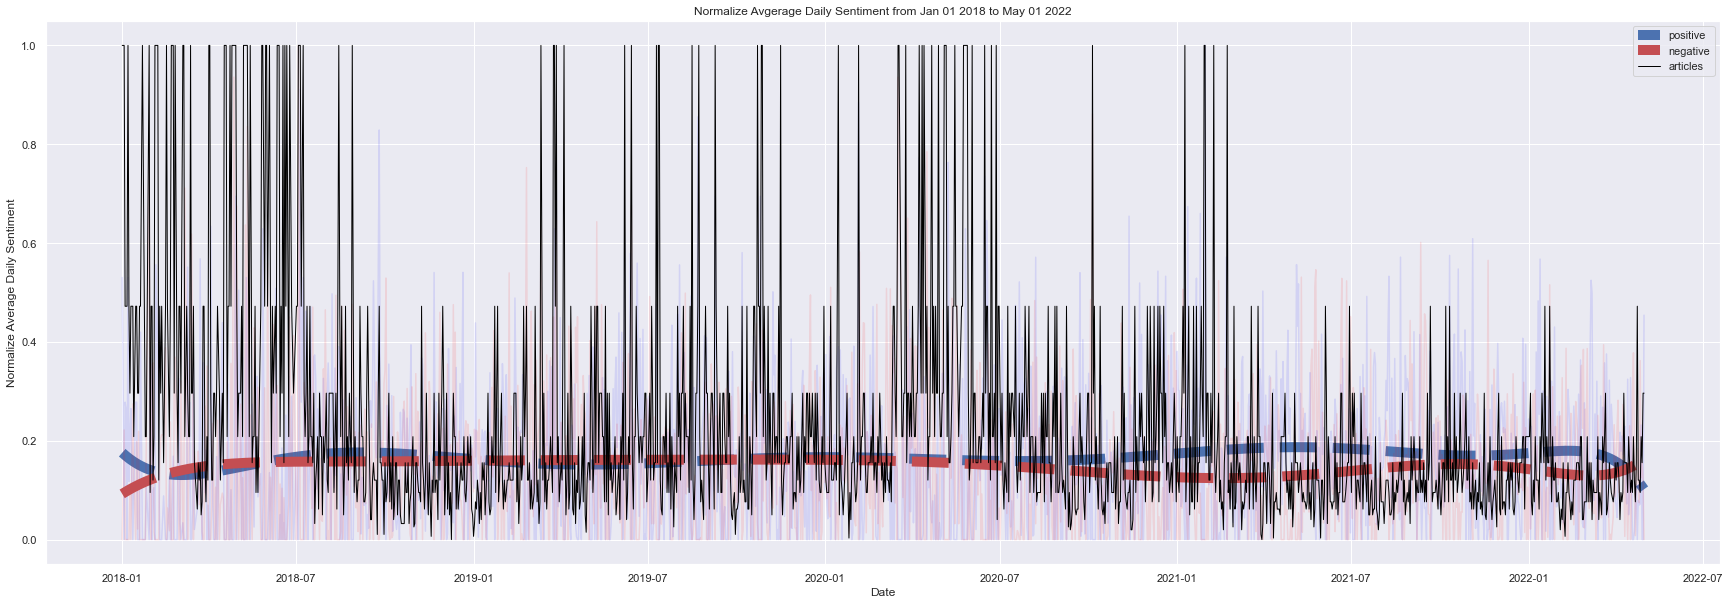

In [146]:
x_values = df_pol['fecha'].unique()
y_neg_values = []
y_pos_values = []
daily_articles_counts=[]
for date in x_values:
  # daily_compund_total = 0
  daily_negative_total = 0
  daily_positive_total = 0
  daily_count = 0
  subset = df_pol[df_pol['fecha']==date]
  # print('on: ', date, ' we have', subset.shape[0], ' entries')
  for i, row in subset.iterrows():
    if row['compound'] >= 0:
      daily_positive_total += row['compound']
    else:
      daily_negative_total += abs(row['compound'])
    daily_count =+1
  avg_daily_negative_total = daily_negative_total/subset.shape[0]
  avg_daily_positive_total = daily_positive_total/subset.shape[0]
  avg_daily_count = daily_count/subset.shape[0]
  y_neg_values.append(avg_daily_negative_total)
  y_pos_values.append(avg_daily_positive_total)
  daily_articles_counts.append(avg_daily_count)
# scale everything
y_neg_values = minMixScale(y_neg_values)
y_pos_values = minMixScale(y_pos_values)
daily_articles_counts = minMixScale(daily_articles_counts)

dates = matplotlib.dates.date2num(x_values)
fig = plt.figure(figsize=(30,10))
plt.plot_date(dates, y_pos_values, 'blue', alpha=0.1)
# calc the trendline for positive
p = np.polyfit(dates, y_pos_values, deg=50)
y_ = np.polyval(p, dates)
plt.plot(dates, y_, 'b--', linewidth=10, label ='positive')

plt.plot_date(dates, y_neg_values, 'red', alpha=0.1)
# calc the trendline for positive
p = np.polyfit(dates, y_neg_values, deg=50)
y_ = np.polyval(p, dates)
plt.plot(dates, y_, 'r--', linewidth=10, label ='negative')

plt.plot_date(dates, daily_articles_counts, 'black', linewidth=1, label ='articles')

minDate = getStringDate(df_pol['fecha'].min().to_pydatetime())
maxDate = getStringDate(df_pol['fecha'].max().to_pydatetime())
plt.title('Normalize Avgerage Daily Sentiment from '+minDate+' to '+maxDate)
plt.ylabel('Normalize Average Daily Sentiment')
plt.xlabel('Date')
plt.legend()
plt.show()

## Sentiment of category over time

Similar to the previous visual this one depicts the the change in sentiment of the course of 2020-2021, for each particular category. 

Each line repersents a different category


['Economía', 'Empresas', 'Internacional', 'Mercados', 'Mundo']


c:\Users\PC\anaconda3\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\PC\anaconda3\lib\site-packages\numpy\lib\polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.

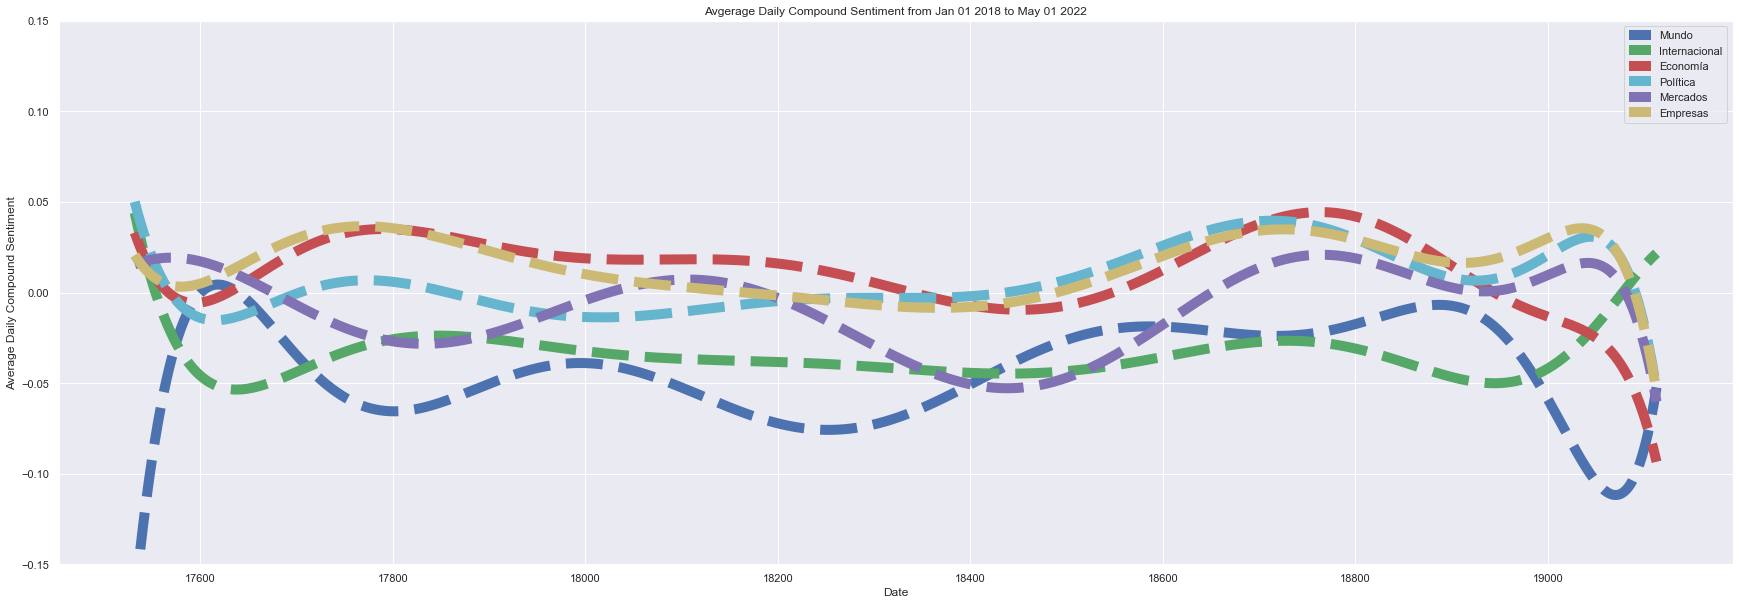

In [147]:
print(topFiveCategoriesOfInterest)
categories = df['categoria'].unique()
x_values = df['fecha'].unique()

dates = matplotlib.dates.date2num(x_values)
fig = plt.figure(figsize=(30,10))

colors = ['b','g','r','c','m','y']

category_data={}
for category, color in zip(categories, colors):
  category_data[category]=[]
  for date in x_values:
    daily_compound_total = 0
    subset = df[(df['fecha']==date) & (df['categoria']==category)]
    # print('on: ', date, ' we have', subset.shape[0],category, ' entries')
    for i, row in subset.iterrows():
      daily_compound_total += row['compound']
    try:
      avg_daily_compound_total = daily_compound_total/subset.shape[0]
    except:
      avg_daily_compound_total = 0

    category_data[category].append(avg_daily_compound_total)

  
  # plt.plot_date(dates, category_data[category], color, alpha=.1)
  # calc the trendline for positive
  p = np.polyfit(dates, category_data[category], deg=50)
  y_ = np.polyval(p, dates)
  plt.plot(dates, y_, color+'--', linewidth=10, label =category)
    
minDate = getStringDate(df['fecha'].min().to_pydatetime())
maxDate = getStringDate(df['fecha'].max().to_pydatetime())
plt.ylim((-.15,.15))
plt.title('Avgerage Daily Compound Sentiment from '+minDate+' to '+maxDate)
plt.ylabel('Average Daily Compound Sentiment')
plt.xlabel('Date')
plt.legend()
plt.show()



## Identifying common Nouns of all articles

Utilizing a more fundamental approach, we can analyze the most frequent words used amoungst our data. 

Word count bar chart below.

C:\Users\PC\AppData\Local\Temp/ipykernel_16768/964691703.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


Text(0.5, 1.0, 'Word Value Counts by TF-IDF')

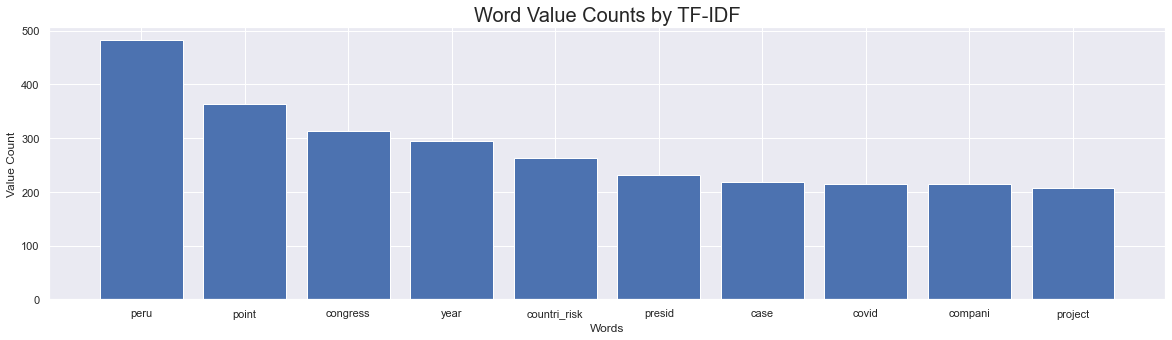

In [148]:
# Generate count vectors and remove stopwords
word_vec = df['nouns'].apply(pd.value_counts).fillna(0)
shortWords = [word for word in word_vec.columns if len(word)<=2]
word_vec = word_vec.drop(stopwords.words('english')+shortWords, axis=1, errors='ignore').fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Words')
plt.ylabel('Value Count')
plt.title('Word Value Counts by TF-IDF', fontsize=20)


## Identifying Common Nouns of negative and positivie titles

Utilizing the same approach, we can leverage our computed dataset to identify the most common nouns! used for positive and negative article titles

C:\Users\PC\AppData\Local\Temp/ipykernel_16768/4194223250.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


Text(0.5, 1.0, 'Negative Article Word Value Counts by TF-IDF')

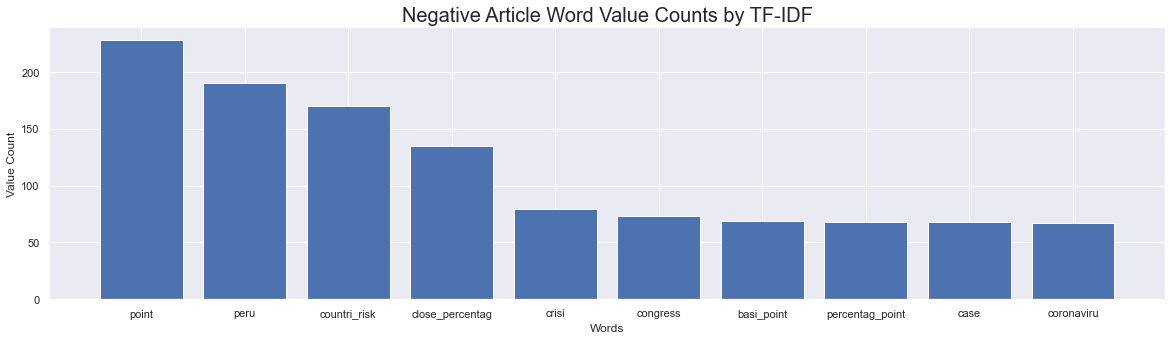

In [149]:
# Generate count vectors and remove stopwords
word_vec = df[df['comp_score']=='neg']['nouns'].apply(pd.value_counts).fillna(0)
shortWords = [word for word in word_vec.columns if len(word)<=2]
word_vec = word_vec.drop(stopwords.words('english')+shortWords, axis=1, errors='ignore').fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Words')
plt.ylabel('Value Count')
plt.title('Negative Article Word Value Counts by TF-IDF', fontsize=20)

example negative article

Theres a lot of usage with the word point.... Let's find out why...

It looks like the algorithm took a lot of news articles from this one site, about this one very specific thing

In [150]:
subset = df[(df['comp_score']=='neg') & (df['nouns'].apply((lambda x: 'point' in x)))]
subset

,categoria,href,fecha,title,year,tokens,lem_tokens,taggedWords,nouns,verbs,adjectives,bigrams,neg,neu,pos,compound,comp_score
61,Mercados,/economia/mercados/riesgo-pais-peru-tres-punto...,2018-01-05,Peru's country risk fell three basis points to...,2018,"[perus, country, risk, fell, three, basis, poi...","[peru, countri_risk, fell, three_basi, point, ...","[(peru, NN), (countri_risk, NN), (fell, VBD), ...","[peru, countri_risk, point, percentag_point]",[fell],[],"[countri_risk, three_basi, percentag_point]",0.174,0.826,0.0,-0.2732,neg
96,Economía,/economia/riesgo-pais-peru-tres-puntos-basicos...,2018-01-08,Peru's country risk fell three basis points to...,2018,"[perus, country, risk, fell, three, basis, poi...","[peru, countri_risk, fell, three_basi, point, ...","[(peru, NN), (countri_risk, NN), (fell, VBD), ...","[peru, countri_risk, point, percentag_point]",[fell],[],"[countri_risk, three_basi, percentag_point]",0.174,0.826,0.0,-0.2732,neg
369,Economía,/economia/bvl-sube-y-ronda-21-000-puntos-miner...,2018-01-23,"BVL rises and is around 21,000 points while mi...",2018,"[bvl, rises, around, points, mining, companies...","[bvl, rise, around, point, mine, compani, fall...","[(bvl, NN), (rise, NN), (around, RB), (point, ...","[bvl, rise, point, mine, compani, fall, perfor...",[],"[due, weak, global]",[],0.146,0.854,0.0,-0.4404,neg
422,Economía,/economia/riesgo-pais-peru-tres-puntos-basicos...,2018-01-26,Peru's country risk fell three basis points to...,2018,"[perus, country, risk, fell, three, basis, poi...","[peru, countri_risk, fell, three_basi, point, ...","[(peru, NN), (countri_risk, NN), (fell, VBD), ...","[peru, countri_risk, point, percentag_point]",[fell],[],"[countri_risk, three_basi, percentag_point]",0.174,0.826,0.0,-0.2732,neg
808,Economía,/economia/riesgo-pais-peru-tres-puntos-basicos...,2018-02-16,Peru's country risk fell three basis points to...,2018,"[perus, country, risk, fell, three, basis, poi...","[peru, countri_risk, fell, three_basi, point, ...","[(peru, NN), (countri_risk, NN), (fell, VBD), ...","[peru, countri_risk, point, percentag_point]",[fell],[],"[countri_risk, three_basi, percentag_point]",0.174,0.826,0.0,-0.2732,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26745,Economía,/economia/riesgo-pais-de-peru-sube-diez-puntos...,2022-04-22,Peru's country risk rises ten basis points and...,2022,"[perus, country, risk, rises, ten, basis, poin...","[peru, countri_risk, rise, ten, basi_point, cl...","[(peru, NN), (countri_risk, NN), (rise, NN), (...","[peru, countri_risk, rise, basi_point, close_p...",[ten],[],"[countri_risk, basi_point, close_percentag]",0.149,0.851,0.0,-0.2732,neg
26822,Economía,/economia/riesgo-pais-de-peru-baja-cuatro-punt...,2022-04-26,Country risk of Peru falls four basic points a...,2022,"[country, risk, peru, falls, four, basic, poin...","[countri_risk, peru, fall, four_basic, point, ...","[(countri_risk, NN), (peru, NN), (fall, NN), (...","[countri_risk, peru, fall, point, close_percen...",[],[four_basic],"[countri_risk, four_basic, close_percentag]",0.139,0.861,0.0,-0.2732,neg
26835,Economía,/economia/riesgo-pais-de-peru-sube-cuatro-punt...,2022-04-27,Country risk of Peru rises four basic points a...,2022,"[country, risk, peru, rises, four, basic, poin...","[countri_risk, peru, rise, four_basic, point, ...","[(countri_risk, NN), (peru, NNS), (rise, VBP),...","[countri_risk, peru, point, close_percentag, p...",[rise],[four_basic],"[countri_risk, four_basic, close_percentag]",0.139,0.861,0.0,-0.2732,neg
26847,Economía,/economia/riesgo-pais-de-peru-sube-cinco-punto...,2022-04-28,Peru's country risk rises five basis points an...,2022,"[perus, country, risk, rises, five, basis, poi...","[peru, countri_risk, rise, five, basi_point, c...","[(peru, NN), (countri_risk, NN), (rise, NN), (...","[peru, countri_risk, rise, basi_point, close_p...",[],[],"[countri_risk, basi_point, close_percentag]",0.149,0.851,0.0,-0.2732,neg


In [151]:
subset = df[(df['comp_score']=='neg') & (df['nouns'].apply((lambda x: 'point' in x)))]
for i, row in subset.iloc[:10].iterrows():
  print('Category: ',row['categoria'], 'Topic: ','Date: ',getStringDate(row['fecha']),'Title: ', row['title'])

Category:  Mercados Topic:  Date:  Jan 05 2018 Title:  Peru's country risk fell three basis points to 1.01 percentage points
Category:  Economía Topic:  Date:  Jan 08 2018 Title:  Peru's country risk fell three basis points to 1.01 percentage points
Category:  Economía Topic:  Date:  Jan 23 2018 Title:  BVL rises and is around 21,000 points while mining companies fall due to weak global performance of metals
Category:  Economía Topic:  Date:  Jan 26 2018 Title:  Peru's country risk fell three basis points to 98 percentage points
Category:  Economía Topic:  Date:  Feb 16 2018 Title:  Peru's country risk fell three basis points to 1.08 percentage points
Category:  Economía Topic:  Date:  Feb 21 2018 Title:  Peru's country risk fell three basis points to 1.07 percentage points
Category:  Mercados Topic:  Date:  Feb 23 2018 Title:  Peru's country risk rose three basis points to 1.14 percentage points
Category:  Economía Topic:  Date:  Mar 02 2018 Title:  Peru's country risk fell two basis 

What is topic 54.0 tho

In [152]:
topics_reference[54]

NameError: name 'topics_reference' is not defined

**Ah okay, so there's somne automated service that creates a news article every couple of days that monitors Peru's Country Risk**

This helps us understand the imbalance in our dataset from a while ago

C:\Users\PC\AppData\Local\Temp/ipykernel_4328/1533233002.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


Text(0.5, 1.0, 'Positive Article Word Value Counts by TF-IDF')

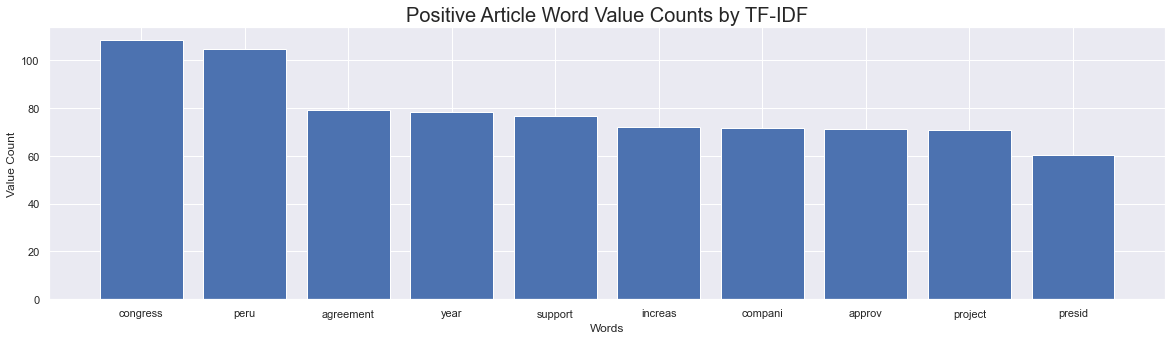

In [ ]:
# Generate count vectors and remove stopwords
word_vec = df[df['comp_score']=='pos']['nouns'].apply(pd.value_counts).fillna(0)
shortWords = [word for word in word_vec.columns if len(word)<=2]
word_vec = word_vec.drop(stopwords.words('english')+shortWords, axis=1, errors='ignore').fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Words')
plt.ylabel('Value Count')
plt.title('Positive Article Word Value Counts by TF-IDF', fontsize=20)

example positive article

Theres a lot of usage with the word congress.... Let's find out why...


In [ ]:
subset.head(2)

,categoria,titulo,href,fecha,year,tokens,lem_tokens,taggedWords,nouns,verbs,adjectives,bigrams,neg,neu,pos,compound,comp_score
523,Política,Composición de bancadas del Congreso tras divi...,/peru/politica/composicion-bancadas-congreso-d...,2018-01-31,2018,"[composición, bancadas, congreso, tras, divisi...","[composicion, bancada, congreso, tra, division...","[(composicion, NN), (bancada, NN), (congreso, ...","[composicion, bancada, congreso, division, fue...",[],[tra],[fuerza_popular],0.0,0.763,0.237,0.4215,pos
2582,Política,Denuncian contratos irregulares de aportantes ...,/peru/politica/planillas-congreso-incrementaro...,2018-06-03,2018,"[denuncian, contratos, irregulares, aportantes...","[denuncian, contrato, irregular, aportant, fue...","[(denuncian, JJ), (contrato, NN), (irregular, ...","[contrato, fuerza_popular, congreso]",[],"[denuncian, irregular, aportant]",[fuerza_popular],0.0,0.781,0.219,0.4215,pos


In [ ]:
subset = df[(df['comp_score']=='pos') & (df['nouns'].apply((lambda x: 'congress' in x)))]
for i, row in subset.iloc[:10].iterrows():
  print('Category: ',row['categoria'], 'Topic: ','Date: ',getStringDate(row['fecha']),'Title: ', row['title'])

Category:  Mundo Topic:  Date:  Jan 09 2018 Title:  Evangelical leaders ask the US Congress to protect the "dreamers"
Category:  Economía Topic:  Date:  Jan 26 2018 Title:  Government will seek to approve in Congress reforms that increase tax collection
Category:  Economía Topic:  Date:  Feb 28 2018 Title:  Warning labeling: Congress approved changing the red seals for the traffic light
Category:  Economía Topic:  Date:  Mar 08 2018 Title:  Congress approves law that replaces DU 003 and incorporates new changes
Category:  Política Topic:  Date:  Mar 10 2018 Title:  Congress made official changes on the issue of confidence of the Premier and dissolution of Parliament
Category:  Economía Topic:  Date:  Mar 15 2018 Title:  Congress approved by insistence the Law to Strengthen the Comptroller's Office
Category:  Economía Topic:  Date:  Mar 21 2018 Title:  Congress: Spokespersons accept the resignation of the PPK president
Category:  Economía Topic:  Date:  Mar 25 2018 Title:  Nelson Shack 

In [ ]:
print('topic 64 --',topics_reference[64])
print('topic 40 --',topics_reference[40])
print('topic 4 --',topics_reference[4])
print('topic 69 --',topics_reference[69])
print('topic 32 --',topics_reference[32])
print('topic 21 --',topics_reference[21])
print('topic 65 --',topics_reference[65])

NameError: name 'topics_reference' is not defined

## Identifying Common Verbs of negative and positivie titles

Utilizing the same approach, we can leverage our computed dataset to identify the most common verbs! used for positive and negative article titles

C:\Users\PC\AppData\Local\Temp/ipykernel_4328/3227542958.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


Text(0.5, 1.0, 'Negative Article Verb Value Counts by TF-IDF')

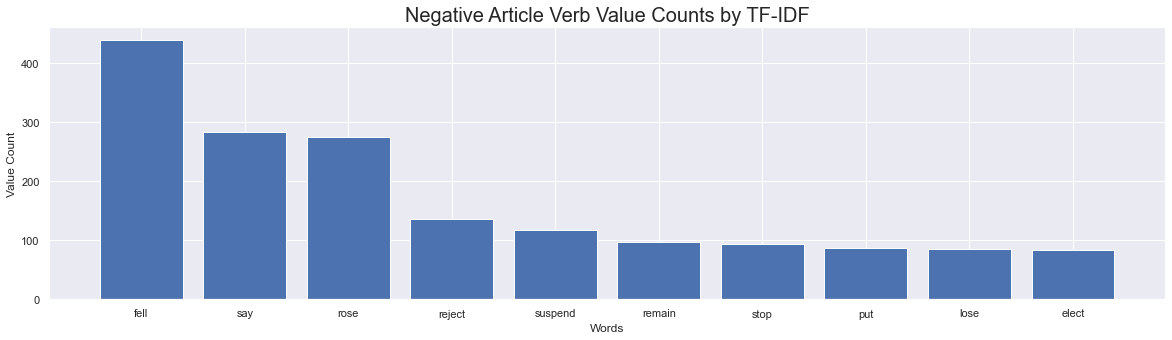

In [ ]:
# Generate count vectors and remove stopwords
word_vec = df[df['comp_score']=='neg']['verbs'].apply(pd.value_counts).fillna(0)
shortWords = [word for word in word_vec.columns if len(word)<=2]
word_vec = word_vec.drop(stopwords.words('english')+shortWords, axis=1, errors='ignore').fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Words')
plt.ylabel('Value Count')
plt.title('Negative Article Verb Value Counts by TF-IDF', fontsize=20)

C:\Users\PC\AppData\Local\Temp/ipykernel_4328/3237287556.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


Text(0.5, 1.0, 'Positive Article Verb Value Counts by TF-IDF')

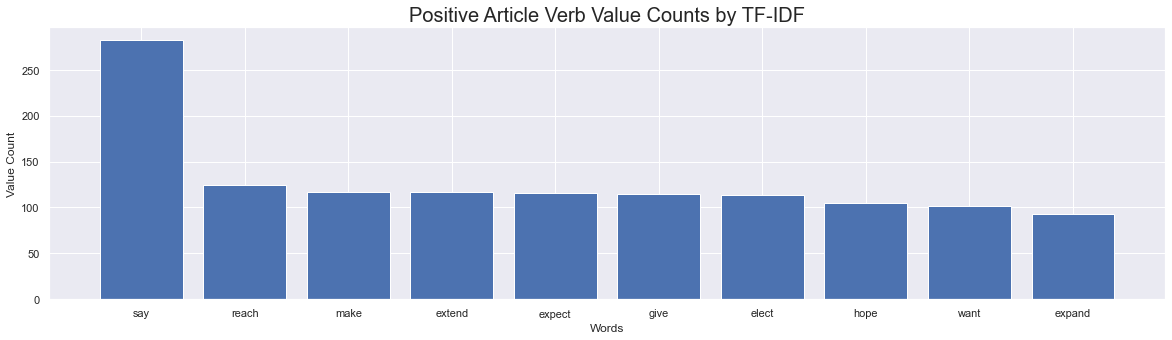

In [ ]:
# Generate count vectors and remove stopwords
word_vec = df[df['comp_score']=='pos']['verbs'].apply(pd.value_counts).fillna(0)
shortWords = [word for word in word_vec.columns if len(word)<=2]
word_vec = word_vec.drop(stopwords.words('english')+shortWords, axis=1, errors='ignore').fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Words')
plt.ylabel('Value Count')
plt.title('Positive Article Verb Value Counts by TF-IDF', fontsize=20)

## Identifying Common Adjectives of negative and positivie titles
Utilizing the same approach, we can leverage our computed dataset to identify the most common adjectives! used for positive and negative article titles

C:\Users\PC\AppData\Local\Temp/ipykernel_4328/858369362.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


Text(0.5, 1.0, 'Negative Article Adjectives Value Counts by TF-IDF')

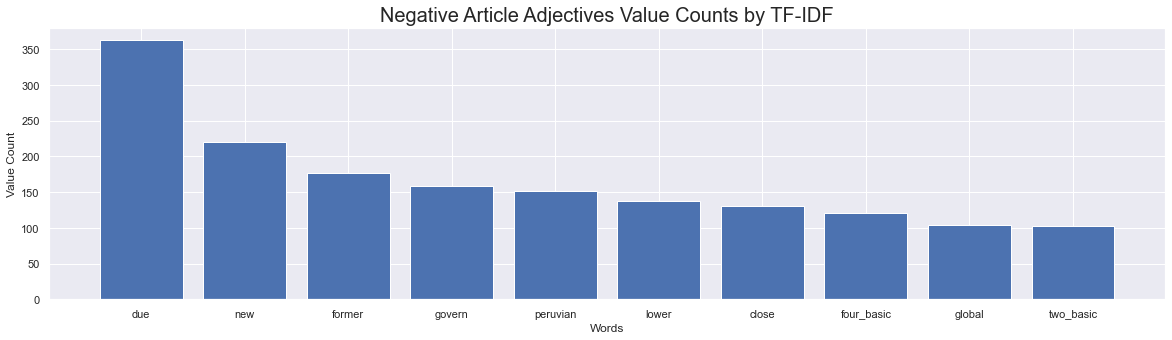

In [ ]:
# Generate count vectors and remove stopwords
word_vec = df[df['comp_score']=='neg']['adjectives'].apply(pd.value_counts).fillna(0)
shortWords = [word for word in word_vec.columns if len(word)<=2]
word_vec = word_vec.drop(stopwords.words('english')+shortWords, axis=1, errors='ignore').fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Words')
plt.ylabel('Value Count')
plt.title('Negative Article Adjectives Value Counts by TF-IDF', fontsize=20)

C:\Users\PC\AppData\Local\Temp/ipykernel_4328/2246260281.py:12: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


Text(0.5, 1.0, 'Positive Article Adjectives Value Counts by TF-IDF')

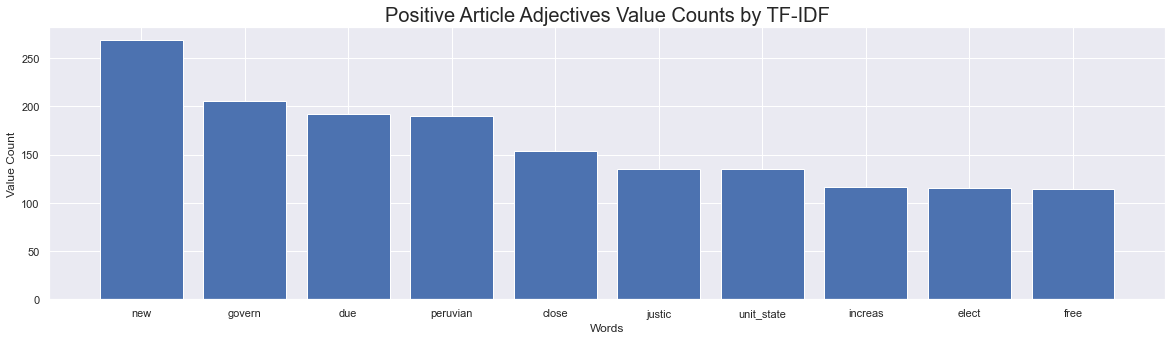

In [ ]:
# Generate count vectors and remove stopwords
word_vec = df[df['comp_score']=='pos']['adjectives'].apply(pd.value_counts).fillna(0)
shortWords = [word for word in word_vec.columns if len(word)<=2]
word_vec = word_vec.drop(stopwords.words('english')+shortWords, axis=1, errors='ignore').fillna(0)

# Compute term frequencies
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)
# Compute inverse document frequencies
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf_dict = {}
for column in tfidf:  tfidf_dict[column] = tfidf[column].sum()
tfidf_words = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:10]

labels = [w[0] for w in tfidf_words]
values = [w[1] for w in tfidf_words]
indexes = np.arange(len(labels))

f, ax = plt.subplots(figsize=(20,5))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Words')
plt.ylabel('Value Count')
plt.title('Positive Article Adjectives Value Counts by TF-IDF', fontsize=20)

## Identifying Most Positve/Negative Articles

Finally, we analyzed the most positive and most negative articles to see the most wonderful and the horrific titles

In [ ]:
print('Extremly Negative Content: ')
print()
for i, row in df[df['neg']>=.6].iterrows():
  print('Date: ',getStringDate(row['fecha']), row['title'])

print()
print('Extremly Positive Content: ')
print()
for i, row in df[df['pos']>=.6].iterrows():
  print('Date: ',getStringDate(row['fecha']), row['title'])

Extremly Negative Content: 

Date:  Jan 15 2018 H&amp;M condemns racism after protests over 'monkey' advertising
Date:  Feb 07 2018 Casino magnate Wynn resigns accused of sexual violence
Date:  Jun 01 2018 Peru condemns violence in Nicaragua and regrets "high number of victims"
Date:  Jul 11 2018 Wall Street closes lower on trade war fears
Date:  Jul 17 2018 UN: Authorities in Nicaragua have killed, imprisoned and tortured people
Date:  Aug 04 2018 Asian countries denounce "real threat" by trade war
Date:  Oct 05 2018 Upset between sponsors of Cristiano Ronaldo, accused of rape
Date:  Nov 24 2018 Cryptocurrencies suffer worst week since bubble burst
Date:  Dec 28 2018 Two tourists killed in bomb attack on bus in Egypt
Date:  Feb 09 2019 Chaos, insomnia, frantic calls: PDVSA struggles to survive
Date:  May 19 2019 Nelson Chui broke his restricted appearance, but avoids preventive detention
Date:  Oct 17 2019 Luis Nava denounces that he received death threats in prison
Date:  Oct 20 2019

---

## Graph group by the compiund by day and by month

In [ ]:
politics

In [ ]:
import datetime
df["month-year"] = pd.to_datetime(df["fecha"].dt.strftime('%Y-%m'))

In [ ]:
xd['compound'].values

array([ 0.06641176,  0.06172   ,  0.05281765, ..., -0.17612143,
       -0.04665455,  0.16399412])

In [ ]:
df.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()

,fecha,compound
0,2018-01-01,0.066412
1,2018-01-02,0.061720
2,2018-01-03,0.052818
3,2018-01-04,0.001007
4,2018-01-05,0.045562
...,...,...
1577,2022-04-27,-0.117918
1578,2022-04-28,-0.005612
1579,2022-04-29,-0.176121
1580,2022-04-30,-0.046655


In [ ]:
df

,categoria,href,fecha,title,year,tokens,lem_tokens,taggedWords,nouns,verbs,adjectives,bigrams,neg,neu,pos,compound,comp_score
0,Mundo,/mundo/vida-verdaderamente-dura-habitantes-teh...,2018-01-01,"The ""truly hard"" life of the inhabitants of Te...",2018,"[truly, hard, life, inhabitants, tehran]","[truli, hard, life, inhabit, tehran]","[(truli, VB), (hard, JJ), (life, NN), (inhabit...","[life, inhabit, tehran]",[truli],[hard],[],0.124,0.619,0.257,0.3612,pos
1,Mundo,/mundo/ecuador-ley-fortalecer-dolarizacion-vig...,2018-01-01,"Ecuador: Law to strengthen dollarization, in f...",2018,"[ecuador, law, strengthen, dollarization, forc...","[ecuador, law, strengthen, dollar, forc, trust...","[(ecuador, NN), (law, NN), (strengthen, NN), (...","[ecuador, law, strengthen, dollar, trust]",[forc],[skeptic],[],0.128,0.513,0.359,0.5574,pos
2,Internacional,/mundo/internacional/pingueinos-resguardan-fri...,2018-01-01,Even the penguins take shelter from the extrem...,2018,"[even, penguins, take, shelter, extreme, cold,...","[even, penguin, take, shelter, extrem, cold, h...","[(even, RB), (penguin, NNS), (take, VBP), (she...","[penguin, shelter, extrem, canada]","[take, cold, hit]",[],[],0.000,1.000,0.000,0.0000,neu
3,Internacional,/mundo/internacional/25-anos-separacion-tercip...,2018-01-01,"The 25 years of the ""velvet separation"" of the...",2018,"[years, velvet, separation, czech, republic, s...","[year, velvet, separ, czech, republ, slovakia]","[(year, NN), (velvet, NN), (separ, NN), (czech...","[year, velvet, separ, czech, republ, slovakia]",[],[],[],0.000,1.000,0.000,0.0000,neu
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...,2018,"[midis, pension, reaches, budget, execution]","[midi, pension, reach, budget, execut]","[(midi, JJ), (pension, NN), (reach, NN), (budg...","[pension, reach, budget, execut]",[],[midi],[],0.000,0.882,0.118,0.0516,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26893,Economía,/economia/se-proyecta-el-ingreso-a-tacna-de-70...,2022-05-01,"The entry to Tacna of 7,000 Chileans is projec...",2022,"[entry, tacna, chileans, projected, first, day...","[entri, tacna, chilean, project, first, day, r...","[(entri, NN), (tacna, NN), (chilean, NN), (pro...","[entri, tacna, chilean, project, day, border]",[reopen],[],[],0.000,1.000,0.000,0.0000,neu
26894,Economía,/economia/estos-son-las-15-ciudades-que-regist...,2022-05-01,These are the 15 cities that registered an inf...,2022,"[cities, registered, inflation, greater, last,...","[citi, regist, inflat, greater, last, month]","[(citi, JJ), (regist, NN), (inflat, NN), (grea...","[regist, inflat, month]",[],"[citi, greater, last]",[],0.000,0.865,0.135,0.3612,pos
26895,Mundo,/mundo/gobierno-boliviano-decreta-un-increment...,2022-05-01,Bolivian government decrees a wage increase re...,2022,"[bolivian, government, decrees, wage, increase...","[bolivian, govern, decre, wage, increas, rejec...","[(bolivian, JJ), (govern, JJ), (decre, NN), (w...","[decre, wage, increas, employ]",[reject],"[bolivian, govern]",[],0.284,0.517,0.198,-0.2500,neg
26896,Mundo,/mundo/chile-reabre-mayoria-de-sus-fronteras-t...,2022-05-01,Chile reopens most of its land borders to tour...,2022,"[chile, reopens, land, borders, tourists]","[chile, reopen, land, border, tourist]","[(chile, NN), (reopen, JJ), (land, NN), (borde...","[chile, land, border, tourist]",[],[reopen],[],0.000,1.000,0.000,0.0000,neu


c:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fecha', ylabel='compound'>

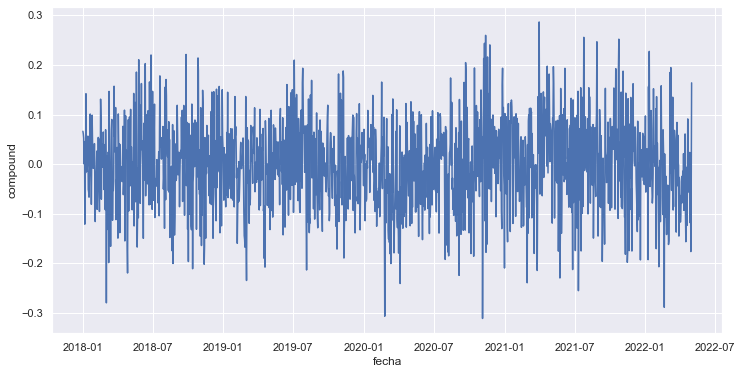

In [ ]:
xd = df.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(xd['fecha'], xd.compound)

In [ ]:

    
    X = xd["fecha"]
    y = xd["compound"]
    
    #Generamos un campo de numero de contagios con media movil de n días
    ts = pd.Series(y.values, index=X.values)
    mean_smoothed = ts.rolling(window=15).mean()

In [ ]:
xd

,fecha,compound
0,2018-01-01,0.066412
1,2018-01-02,0.061720
2,2018-01-03,0.052818
3,2018-01-04,0.001007
4,2018-01-05,0.045562
...,...,...
1577,2022-04-27,-0.117918
1578,2022-04-28,-0.005612
1579,2022-04-29,-0.176121
1580,2022-04-30,-0.046655


df.to_excel('')

In [153]:
grupo = df.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()

In [ ]:
categoria = df[df['categoria'] == categoria]
categoria = categoria.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
categoria['SMA_9'] = 


In [154]:
grupo

,fecha,compound
0,2018-01-01,0.066412
1,2018-01-02,0.061720
2,2018-01-03,0.052818
3,2018-01-04,0.001007
4,2018-01-05,0.045562
...,...,...
1577,2022-04-27,-0.117918
1578,2022-04-28,-0.005612
1579,2022-04-29,-0.176121
1580,2022-04-30,-0.046655


In [ ]:
gr

In [155]:

grupo['SMA_9'] = grupo['compound'].rolling(window=9, min_periods=1).mean()
grupo['SMA_30'] = grupo['compound'].rolling(window=30, min_periods=1).mean()


In [ ]:
grupo

,fecha,compound,SMA_9
0,2018-01-01,0.066412,0.066412
1,2018-01-02,0.061720,0.064066
2,2018-01-03,0.052818,0.060316
3,2018-01-04,0.001007,0.045489
4,2018-01-05,0.045562,0.045504
...,...,...,...
1577,2022-04-27,-0.117918,-0.030916
1578,2022-04-28,-0.005612,-0.017833
1579,2022-04-29,-0.176121,-0.031550
1580,2022-04-30,-0.046655,-0.046875


<AxesSubplot:xlabel='fecha', ylabel='SMA_30'>

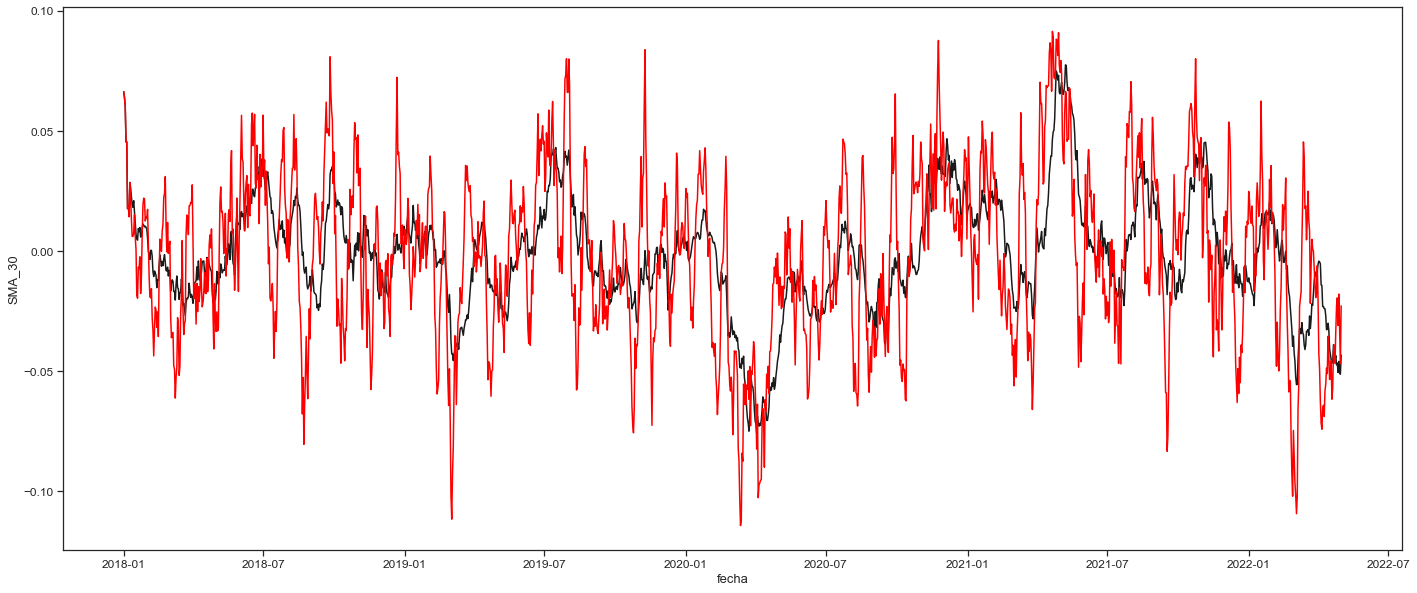

In [160]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
sns.lineplot(data=grupo, x = 'fecha', y = 'SMA_30', color = 'k')
sns.lineplot(data=grupo, x = 'fecha', y = 'SMA_9', color= 'red')


In [ ]:
mundo

,fecha,categoria,compound,SMA_9
2,0.041957,Mundo,0.041957,0.041957
6,0.119009,Mundo,0.196060,0.119009
10,0.130372,Mundo,0.153100,0.130372
14,0.097779,Mundo,0.000000,0.097779
20,0.106013,Mundo,0.138950,0.106013
...,...,...,...,...
7324,0.076761,Mundo,0.027700,0.076761
7329,0.040161,Mundo,0.025400,0.040161
7333,-0.03791,Mundo,-0.225933,-0.037910
7336,-0.090506,Mundo,-0.145220,-0.090506


In [ ]:
grupo[grupo['categoria'] == 'Mundo'] = mundo.rolling(window=9, min_periods=1).mean()

IndexError: single positional indexer is out-of-bounds

In [ ]:
mundo.rolling(window=9, min_periods=1).mean()

,compound
2,0.041957
6,0.119009
10,0.130372
14,0.097779
20,0.106013
...,...
7324,0.076761
7329,0.040161
7333,-0.037910
7336,-0.090506


In [ ]:
grupo[grupo['categoria'] == 'Mundo']['compound']

2       0.041957
6       0.196060
10      0.153100
14      0.000000
20      0.138950
          ...   
7324    0.027700
7329    0.025400
7333   -0.225933
7336   -0.145220
7340    0.040657
Name: compound, Length: 1221, dtype: float64

<AxesSubplot:>

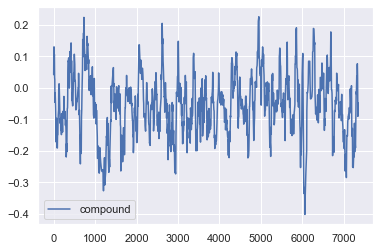

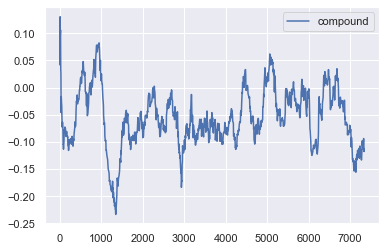

In [ ]:
grupo[grupo['categoria'] == 'Mundo'].rolling(window=9, min_periods=1).mean()
grupo[grupo['categoria'] == 'Mundo'].rolling(window=40, min_periods=1).mean().plot()

#grupo[grupo['categoria'] == 'Economía'].rolling(window=9, min_periods=1).mean().plot()


<AxesSubplot:>

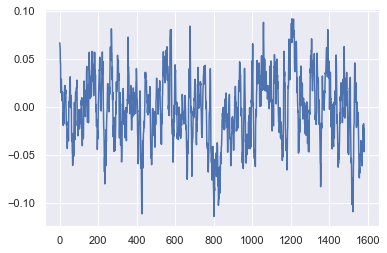

In [ ]:
xd['compound'].rolling(window=9, min_periods=1).mean().plot()
#BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

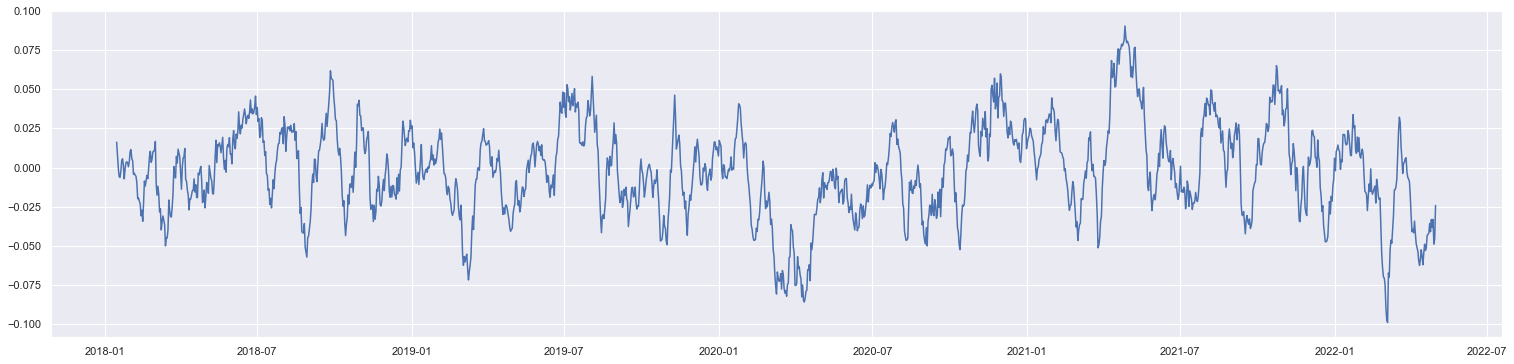

In [ ]:
plt.figure(figsize=(26,6))
plt.plot(mean_smoothed)


In [161]:
df.to_excel('../data/base_final.xlsx')

In [ ]:
xd.to_excel('C:/Users/PC/Desktop/index_month.xlsx')

In [ ]:
ga = df[(df['categoria'] =='Economía') | ( df['categoria'] =="Política")]

In [ ]:
df[(df['categoria'] =='Economía') | ( df['categoria'] =="Política")]

,categoria,href,fecha,title,year,tokens,lem_tokens,taggedWords,nouns,verbs,adjectives,bigrams,neg,neu,pos,compound,comp_score
4,Economía,/economia/midis-pension-65-llega-al-99-9-ejecu...,2018-01-01,Midis: Pension 65 reaches 99.9% of budget exec...,2018,"[midis, pension, reaches, budget, execution]","[midi, pension, reach, budget, execut]","[(midi, JJ), (pension, NN), (reach, NN), (budg...","[pension, reach, budget, execut]",[],[midi],[],0.0,0.882,0.118,0.0516,pos
6,Economía,/economia/precios-al-consumidor-nivel-nacional...,2018-01-01,Consumer Prices at the National Level rose 0.1...,2018,"[consumer, prices, national, level, rose, dece...","[consum, price, nation, level, rose, decemb, a...","[(consum, JJ), (price, NN), (nation, NN), (lev...","[price, nation, level, accumul]",[rose],"[consum, decemb]",[],0.0,1.000,0.000,0.0000,neu
7,Economía,/economia/adex-brindara-conferencias-ferias-mi...,2018-01-01,Adex will give conferences so that agro-export...,2018,"[adex, give, conferences, agroexports, recover...","[adex, give, confer, agroexport, recov, dynam]","[(adex, NN), (give, VB), (confer, NN), (agroex...","[adex, confer, agroexport, recov, dynam]",[give],[],[],0.0,0.755,0.245,0.3818,pos
8,Política,/peru/politica/trump-recibe-ano-nuevo-tuiteand...,2018-01-01,"Trump receives the New Year tweeting, after pa...",2018,"[trump, receives, new, year, tweeting, party, ...","[trump, receiv, new, year, tweet, parti, club]","[(trump, NN), (receiv, NN), (new, JJ), (year, ...","[trump, receiv, year, tweet, parti, club]",[],[new],[],0.0,0.787,0.213,0.4019,pos
9,Economía,/economia/fetua-prohibe-bitcoin-egipto-223979-...,2018-01-01,A fatwa bans bitcoin in Egypt,2018,"[fatwa, bans, bitcoin, egypt]","[fatwa, ban, bitcoin, egypt]","[(fatwa, JJ), (ban, NN), (bitcoin, NN), (egypt...","[ban, bitcoin, egypt]",[],[fatwa],[],0.0,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26883,Política,/peru/politica/pedro-castillo-dueno-de-casa-de...,2022-05-01,Sarratea homeowner offered Ricardo Márquez to ...,2022,"[sarratea, homeowner, offered, ricardo, márque...","[sarratea, homeown, offer, ricardo, marquez, p...","[(sarratea, NN), (homeown, NN), (offer, NN), (...","[sarratea, homeown, offer, prime_minist, casti...",[ricardo],[marquez],[prime_minist],0.0,1.000,0.000,0.0000,neu
26888,Economía,/economia/bolsa-de-lima-tendria-el-respaldo-de...,2022-05-01,Lima Stock Exchange would have the support of ...,2022,"[lima, stock, exchange, would, support, metal,...","[lima_stock, exchang, would, support, metal_pr...","[(lima_stock, NN), (exchang, NN), (would, MD),...","[lima_stock, exchang, metal_price, year]",[support],[],"[lima_stock, metal_price]",0.0,0.828,0.172,0.4019,pos
26892,Economía,/economia/mineria-e-hidrocarburos-retrocedio-1...,2022-05-01,Mining and Hydrocarbons fell 1.21% in March an...,2022,"[mining, hydrocarbons, fell, march, fishing]","[mine, hydrocarbon, fell, march, fish]","[(mine, NN), (hydrocarbon, NN), (fell, VBD), (...","[mine, hydrocarbon, fish]",[fell],[],[],0.0,1.000,0.000,0.0000,neu
26893,Economía,/economia/se-proyecta-el-ingreso-a-tacna-de-70...,2022-05-01,"The entry to Tacna of 7,000 Chileans is projec...",2022,"[entry, tacna, chileans, projected, first, day...","[entri, tacna, chilean, project, first, day, r...","[(entri, NN), (tacna, NN), (chilean, NN), (pro...","[entri, tacna, chilean, project, day, border]",[reopen],[],[],0.0,1.000,0.000,0.0000,neu


c:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fecha', ylabel='compound'>

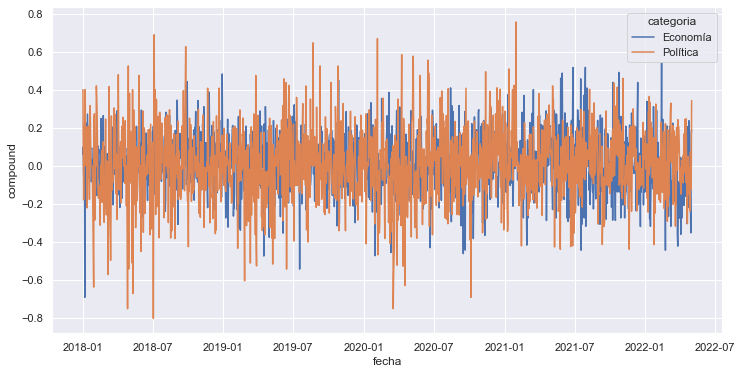

In [ ]:
xd = ga.groupby(['fecha',"categoria"]).agg({'compound': 'mean'}).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(xd['fecha'], xd.compound, hue=xd.categoria)

In [ ]:
xd.to_excel("C:/Users/PC/Desktop/sent_index.xlsx")

# Saving Completed DataFile into a safe storage repository incase we need to restart

In [ ]:
date_obj = dt.datetime.now()
file_name = getStringDate(date_obj).replace(" ",'_')+'.csv'
path=project_data_path+'/'+file_name
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)